**Goal**: look at all the data collected collectively, e.g. 
- all the code heatmaps from the eye tracking study
- all the processed token>token user interaction with deceay 0.1
- all the human answers to the questions
- all the followup attention (post-processed from CodeGen output)

In [25]:
import project_path

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import pathlib
import json
import numpy as np
import pandas as pd

from typing import Dict, Any, List, Tuple, Union, Callable

In [2]:
from attwizard.script.utils import read_data_in_parallel
from attwizard.script.utils import read_config_file


In [9]:
%load_ext autoreload
%autoreload 2

In [7]:
EXP_FOLDER_HUMAN = "../data/eye_tracking_attention/eye_v10"

# Read Metadata

In [21]:
def read_json(filename):
    with open(filename, "r") as f:
        return json.load(f)

metadata = read_data_in_parallel(
    base_folder=os.path.join(EXP_FOLDER_HUMAN, "metadata"),
    file_type_extension=".json",
    read_function=read_json,
    name_extractor_function=lambda filename: pathlib.Path(filename).stem)

n of data read:  38


In [27]:
metadata[list(metadata.keys())[0]].keys()
for k in metadata.keys():
    print(metadata[k]["source_code"])

python/tree_Q2.py
python/triangle_Q3.py
cpp/triangle_Q3.cpp
python/multithread_Q1.py
cpp/hannoi_Q2.cpp
cpp/hannoi_Q1.cpp
cpp/tree_Q3.cpp
cpp/triangle_Q1.cpp
python/hannoi_Q2.py
python/Nqueens_Q1.py
csharp/hannoi_Q2.cs
cpp/tree_Q2.cpp
cpp/tree_Q3.cpp
python/triangle_Q1.py
csharp/Nqueens_Q3.cs
python/tree_Q2.py
csharp/hannoi_Q3.cs
python/triangle_Q1.py
csharp/triangle_Q3.cs
cpp/triangle_Q1.cpp
csharp/triangle_Q2.cs
python/tree_Q1.py
csharp/Nqueens_Q1.cs
python/hannoi_Q1.py
cpp/multithread_Q2.cpp
cpp/Nqueens_Q3.cpp
python/hannoi_Q2.py
cpp/hannoi_Q1.cpp
cpp/tree_Q2.cpp
csharp/tree_Q1.cs
cpp/hannoi_Q1.cpp
python/hannoi_Q3.py
cpp/triangle_Q1.cpp
python/multithread_Q1.py
python/multithread_Q2.py
python/triangle_Q1.py
cpp/Nqueens_Q3.cpp
cpp/Nqueens_Q2.cpp


In [52]:
def show_images(
    img_data: Dict[str, Any], metadata: Dict[str, Any], 
    n_cols=5, img_size=4):
    """Plot all the images in a grid, each column is a different file."""
    n_images = len(img_data)
    IMAGE_SIZE = 4
    N_COLS = 5
    N_ROWS = int(n_images / 3)
    fig, axes = plt.subplots(
        nrows=N_ROWS, ncols=N_COLS, 
        figsize=(IMAGE_SIZE * N_COLS, IMAGE_SIZE * N_ROWS))
    all_root_filenames = sorted(list(set([
        pathlib.Path(metadata[k]["source_code"]).stem.split("_")[0]
        for k in img_data.keys()])))
    current_row = {root_name: 0 for root_name in all_root_filenames}  
    sorted_source_codes = sorted([
        (metadata[k]["source_code"], k) for k in img_data.keys()])
    for i, (source_code, k) in enumerate(sorted_source_codes):
        c_data = img_data[k]
        source_code = metadata[k]["source_code"]
        base_file = pathlib.Path(source_code).stem.split("_")[0]
        c_col = list(current_row.keys()).index(base_file)
        c_row = current_row[base_file]
        axes[c_row, c_col].imshow(c_data)
        axes[c_row, c_col].set_title(source_code)
        axes[c_row, c_col].axis('off')
        current_row[base_file] += 1
    # deactivate the unused axes
    for i in range(N_ROWS):
        for j in range(N_COLS):
            c_ax = axes[i, j]
            c_ax.axis('off')
    plt.show()


In [65]:
def show_matrices(
    matrix_data: Dict[str, Any], metadata: Dict[str, Any], 
    n_cols=5, img_size=4, kw_seaborn=None):
    """Plot all the matrices in a grid, each column is a different file.
    
    Note that the matrices are plotted as heatmaps."""
    n_images = len(matrix_data)
    IMAGE_SIZE = 4
    N_COLS = 5
    N_ROWS = int(n_images / 3)
    if "cmap" not in kw_seaborn.keys():
        kw_seaborn["cmap"] = "Reds"
    fig, axes = plt.subplots(
        nrows=N_ROWS, ncols=N_COLS, 
        figsize=(IMAGE_SIZE * N_COLS, IMAGE_SIZE * N_ROWS))
    all_root_filenames = sorted(list(set([
        pathlib.Path(metadata[k]["source_code"]).stem.split("_")[0]
        for k in matrix_data.keys()])))
    current_row = {root_name: 0 for root_name in all_root_filenames}  
    sorted_source_codes = sorted([
        (metadata[k]["source_code"], k) for k in matrix_data.keys()])
    for i, (source_code, k) in enumerate(sorted_source_codes):
        c_data = matrix_data[k]
        source_code = metadata[k]["source_code"]
        base_file = pathlib.Path(source_code).stem.split("_")[0]
        c_col = list(current_row.keys()).index(base_file)
        c_row = current_row[base_file]
        sns.heatmap(c_data, ax=axes[c_row, c_col], **kw_seaborn)
        axes[c_row, c_col].set_title(source_code)
        axes[c_row, c_col].axis('off')
        current_row[base_file] += 1
    # deactivate the unused axes
    for i in range(N_ROWS):
        for j in range(N_COLS):
            c_ax = axes[i, j]
            c_ax.axis('off')
    plt.show()

# Read Code Heatmaps

In [16]:
def read_image(filename):
    return mpimg.imread(filename)

img_data = read_data_in_parallel(
    base_folder=os.path.join(EXP_FOLDER_HUMAN, "code_heatmap"),
    file_type_extension=".png",
    read_function=read_image,
    name_extractor_function=lambda filename: pathlib.Path(filename).stem)



n of data read:  38


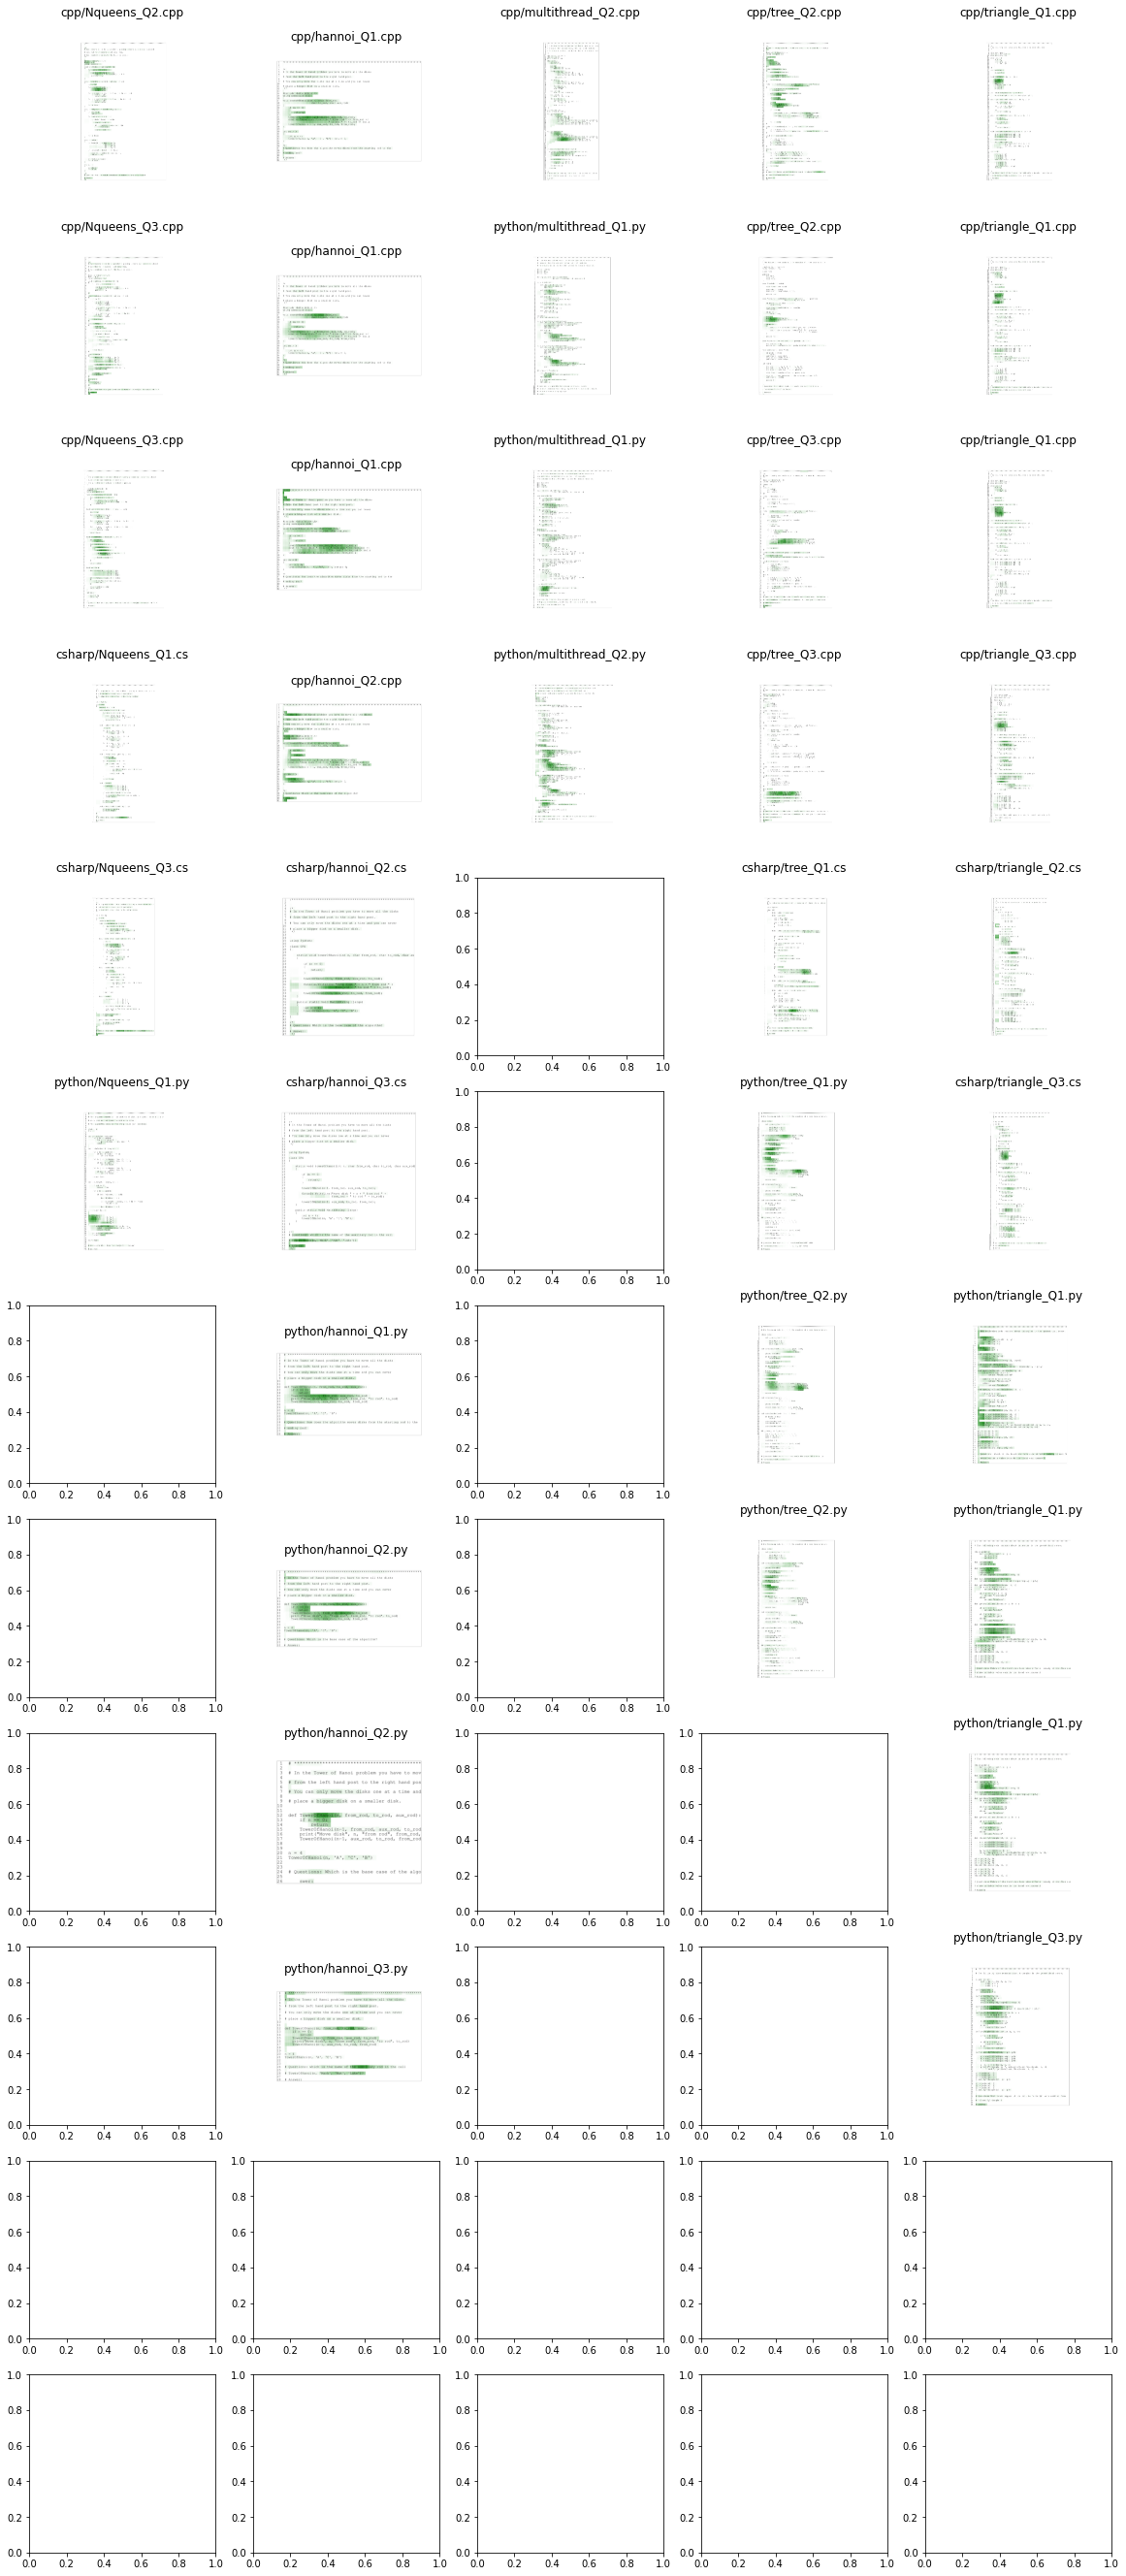

In [50]:
show_images(
    img_data=img_data, metadata=metadata,
    n_cols=5, img_size=4)

# Token -> Token Heatmaps

In [35]:
img_tokens_tokens_data = read_data_in_parallel(
    base_folder=os.path.join(EXP_FOLDER_HUMAN, "decay_0.1", "img_followup_tokens_tokens_model"),
    file_type_extension=".png",
    read_function=read_image,
    name_extractor_function=lambda filename: pathlib.Path(filename).stem)

n of data read:  38


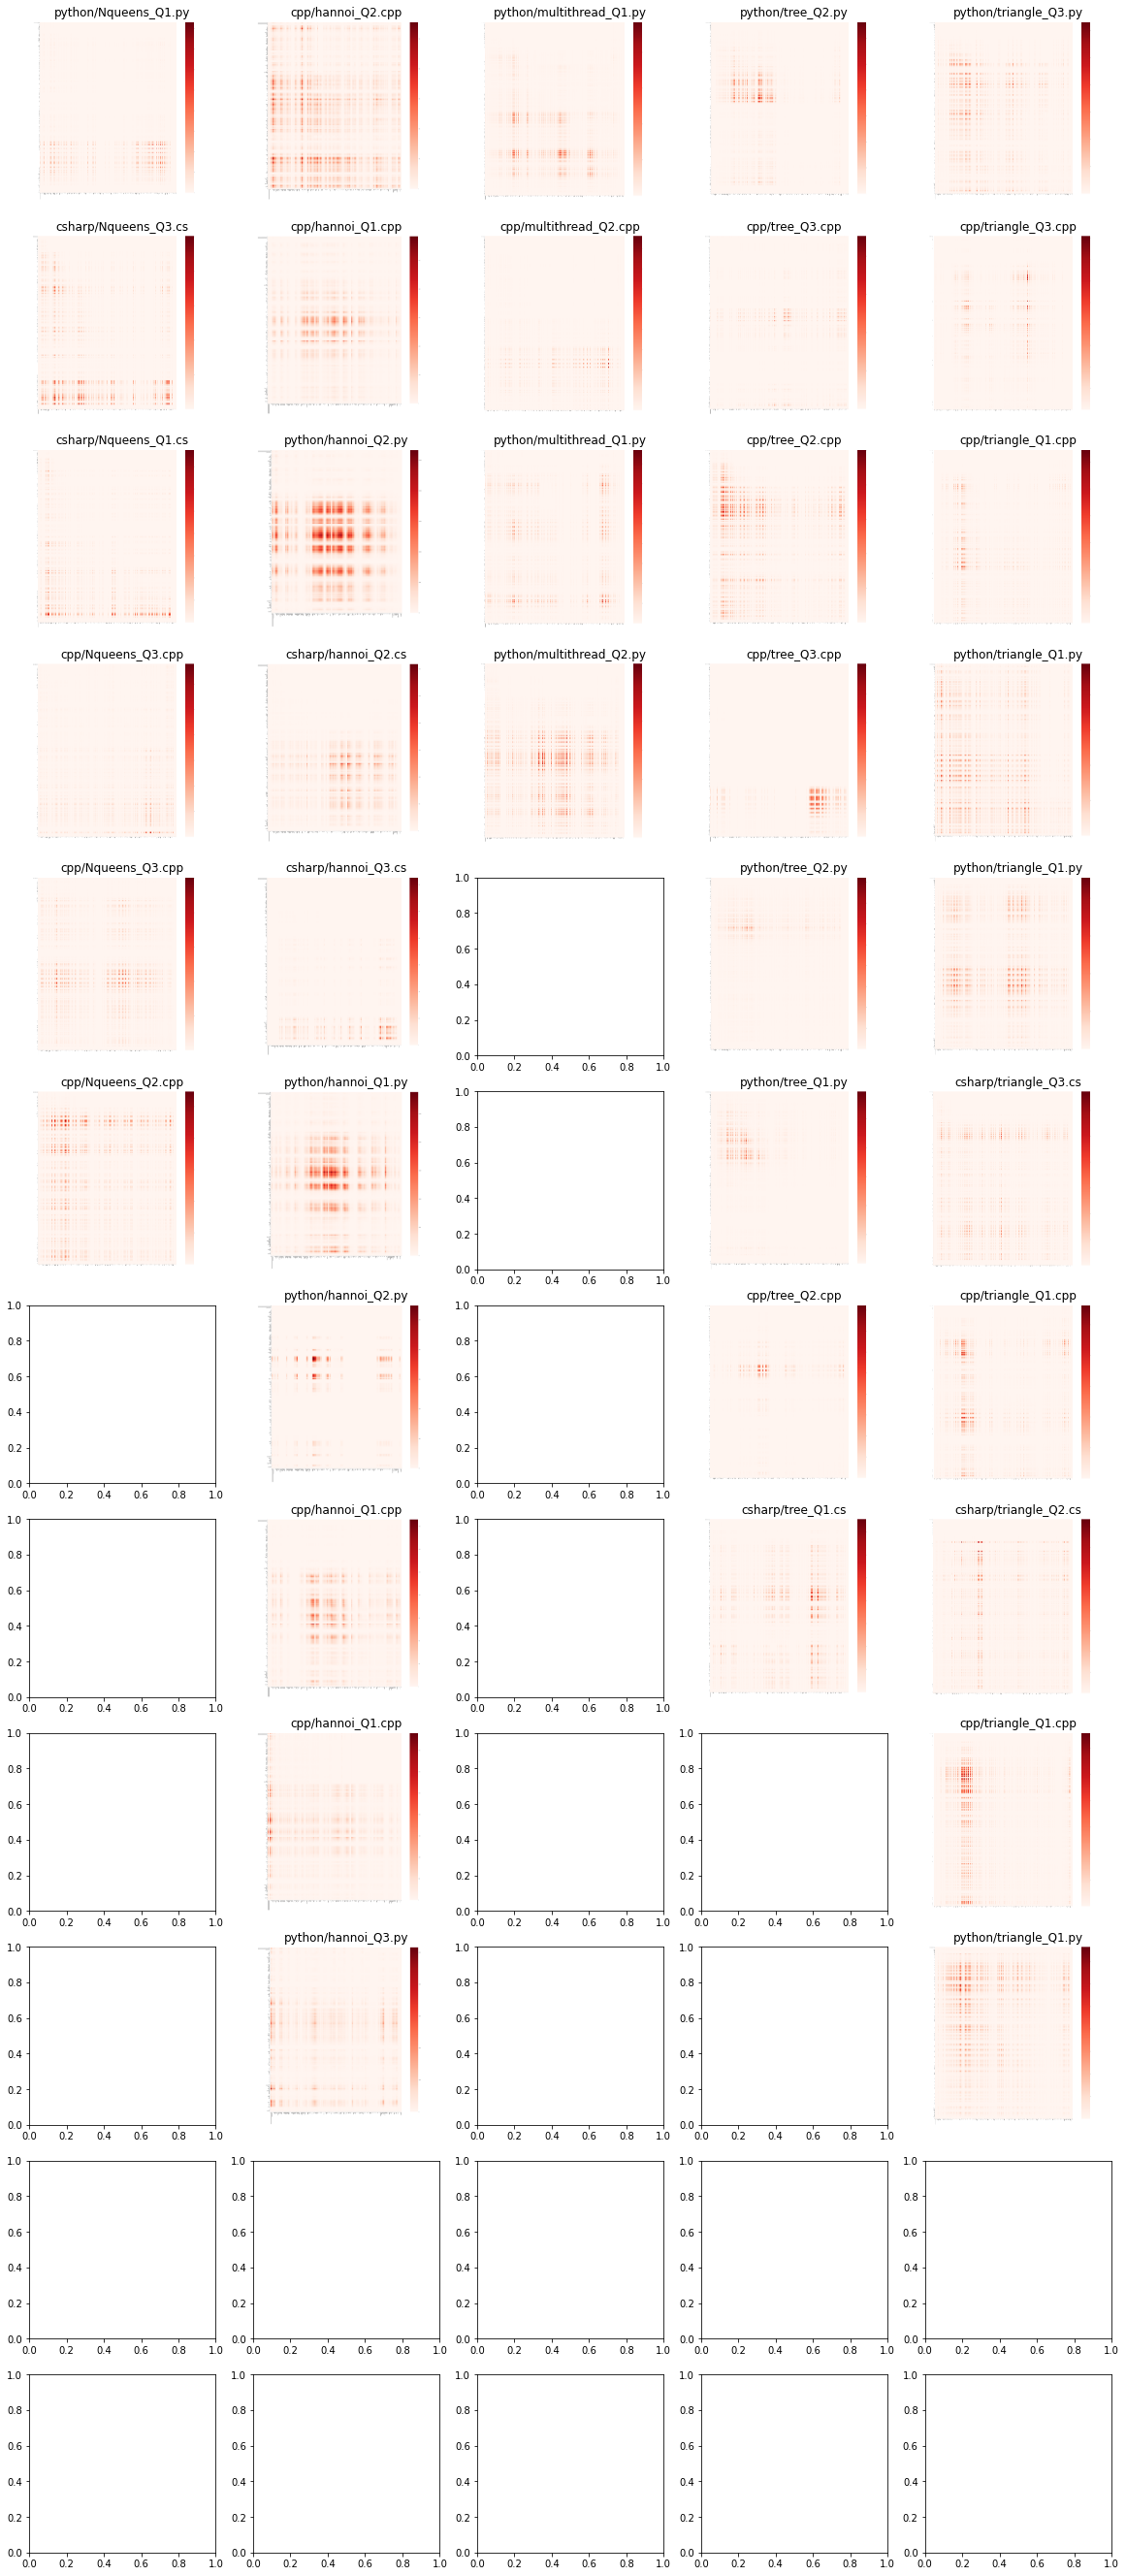

In [44]:
show_images(
    img_data=img_tokens_tokens_data, metadata=metadata,
    n_cols=5, img_size=4)

# Read Matrices and Normalize

In [55]:
def read_matrix(filename):
    return np.load(filename)

data_tokens_tokens = read_data_in_parallel(
    base_folder=os.path.join(EXP_FOLDER_HUMAN, "decay_0.1", "data_followup_tokens_tokens_model"),
    file_type_extension=".npy",
    read_function=read_matrix,
    name_extractor_function=lambda filename: pathlib.Path(filename).stem)

n of data read:  38


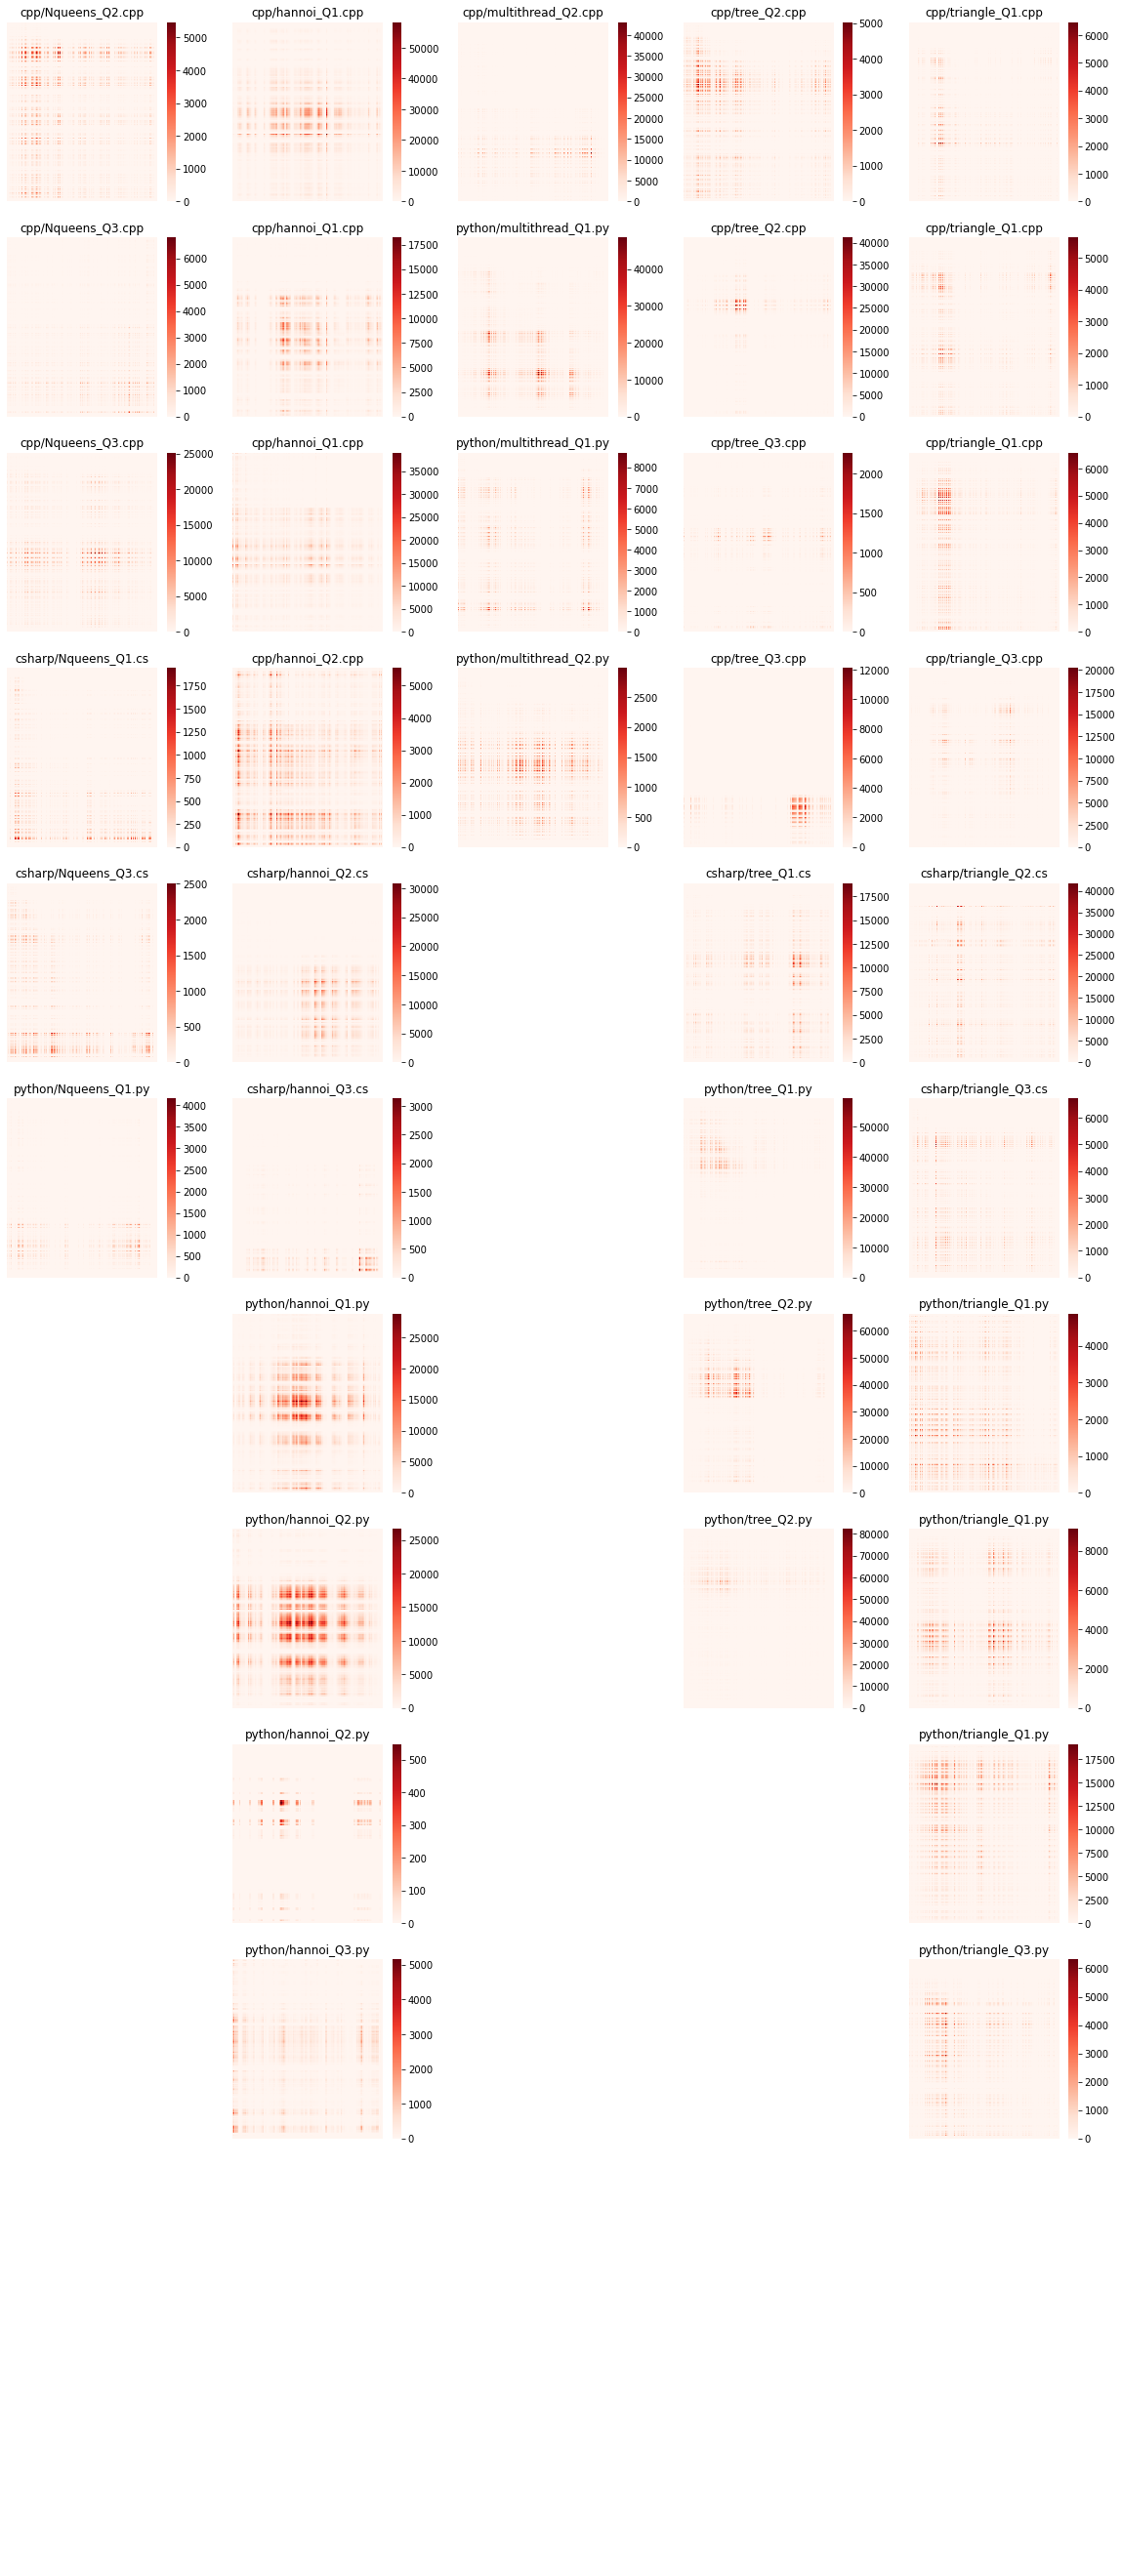

In [56]:
show_matrices(
    matrix_data=data_tokens_tokens,
    metadata=metadata,
    n_cols=5, img_size=4)

In [64]:
# normalize the data matrices by row, so that they sum up to 1
normalized_data_tokens_tokens = {
    k: data_tokens_tokens[k] / 
        np.where(
            np.sum(data_tokens_tokens[k], axis=1, keepdims=True) == 0, 
            1, 
            np.sum(data_tokens_tokens[k], axis=1, keepdims=True))
    for k, v in data_tokens_tokens.items()}

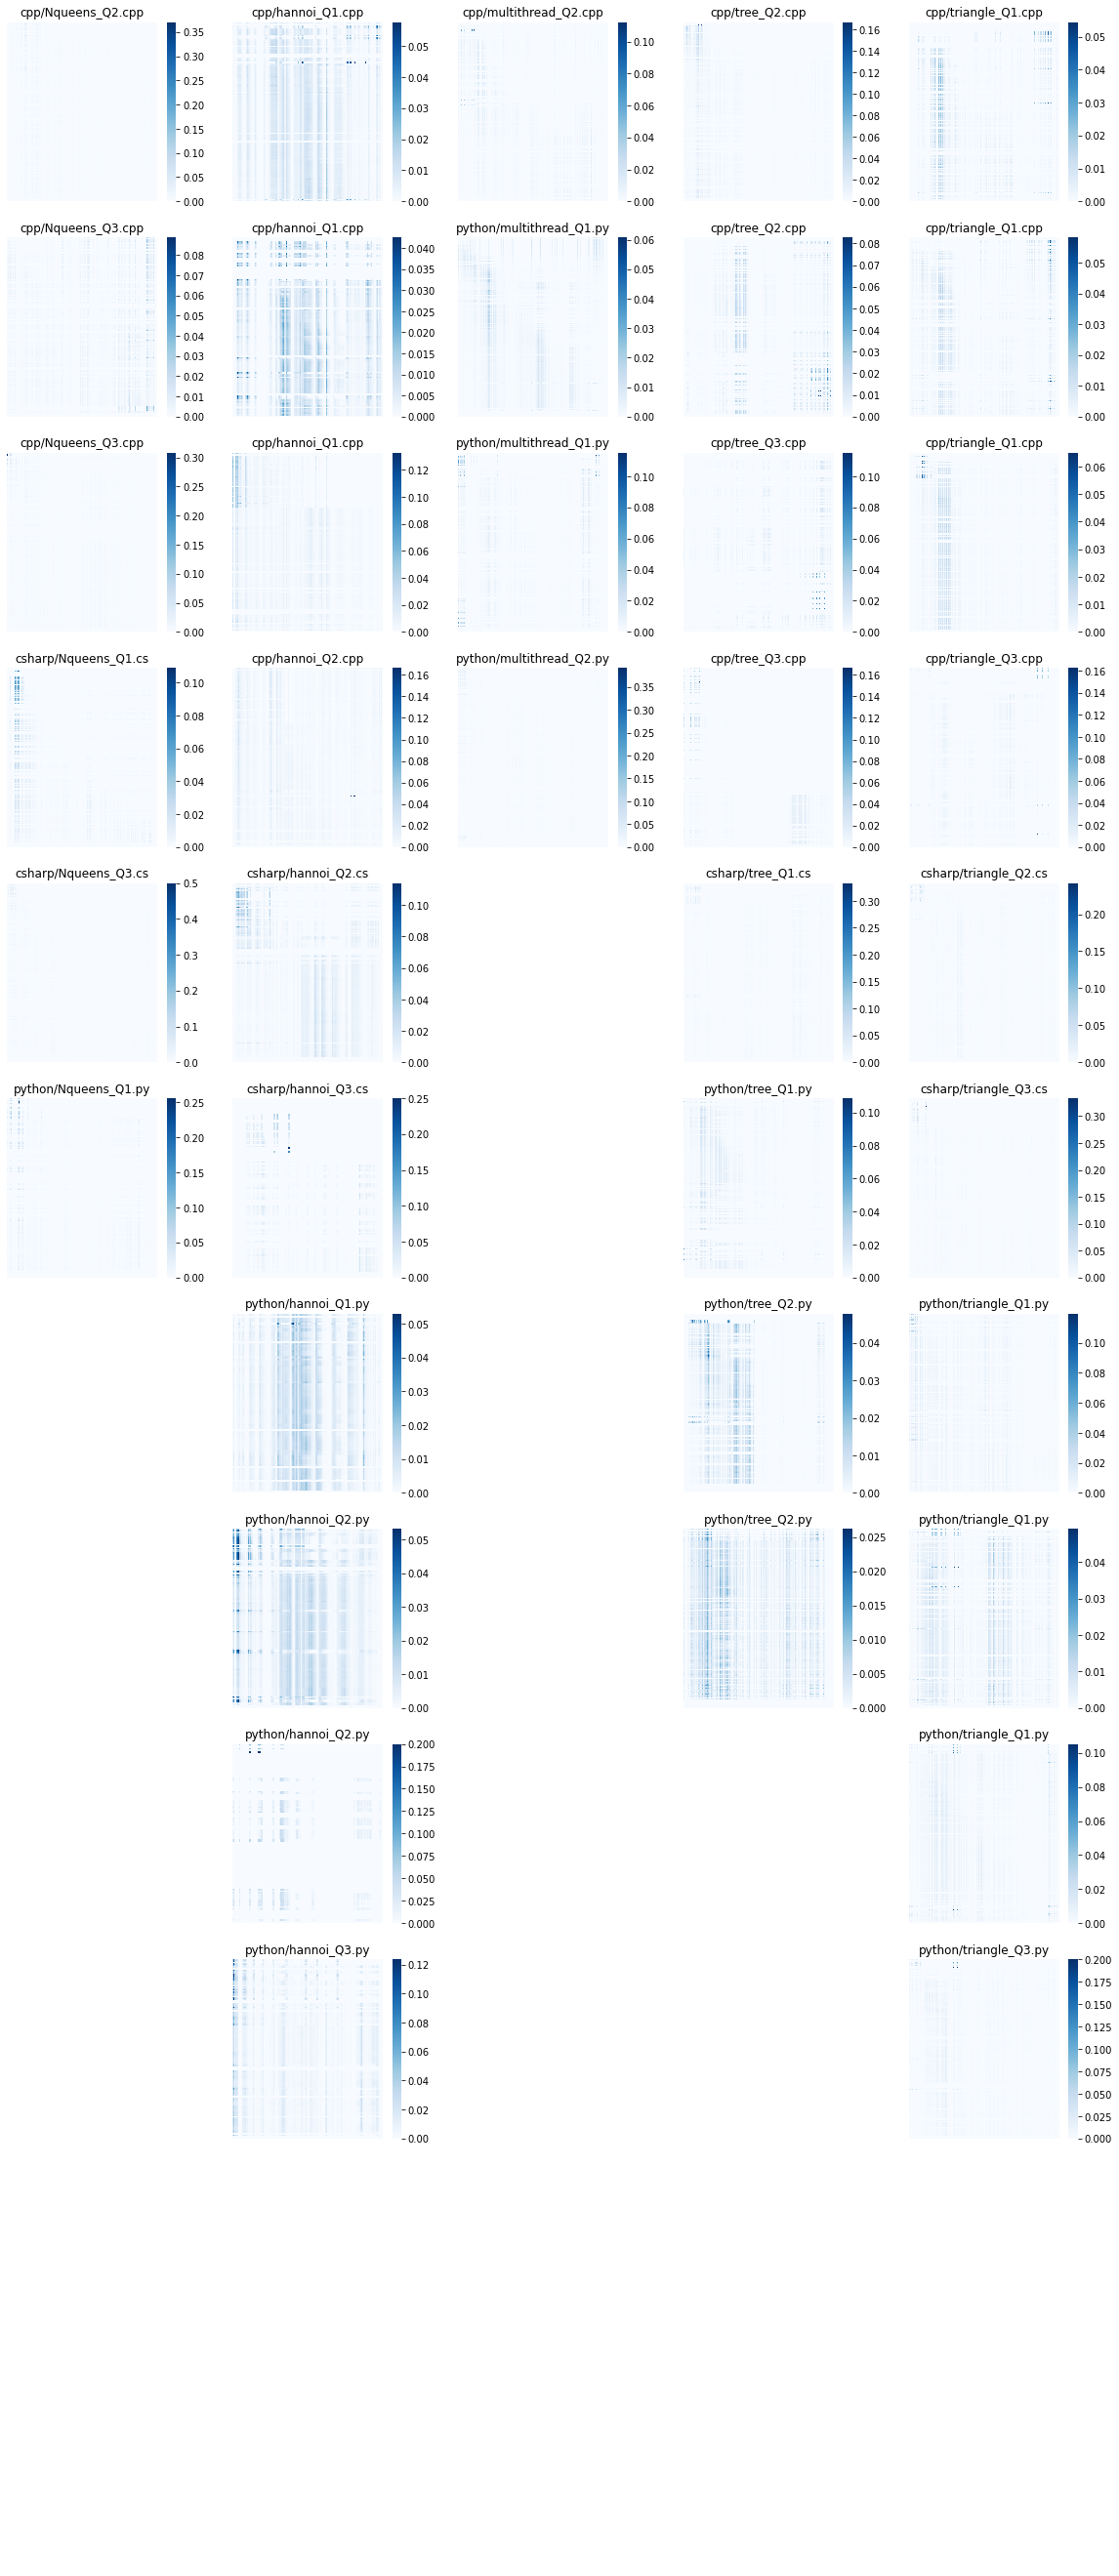

In [66]:
show_matrices(
    matrix_data=normalized_data_tokens_tokens,
    metadata=metadata,
    n_cols=5, img_size=4,
    kw_seaborn={"cmap": "Blues"})

# Read Users' Answers

In [4]:
config = read_config_file("../config/eye_v10.yaml")

In [10]:
from eye_tracking.post_processing import get_answer_of

In [93]:
df = get_answer_of(
    unique_data_id='1d5b6a',
    user_name='UconsumerU',
    task_number=0,
    dir_participants='../data/eye_tracking_studies/batch_1',
    dir_questions='../eye_tracking/samples_batch_1',
    output_folder='../data/eye_tracking_attention/eye_v10',
    override_everything=False,
    debug=False
)

In [94]:
df.head()

,source,time,FPOGX,FPOGY,FPOGD,source_filename,content_lines
0,eye,52772048.14,0.82882,0.80970,3.34814,NaN,NaN
1,eye,52773423.14,0.82774,0.79704,0.97070,NaN,NaN
2,eye,52773698.05,0.58509,0.87309,0.21045,NaN,NaN
3,eye,52774554.98,0.83714,0.80413,0.79248,NaN,NaN
4,eye,52774846.48,0.78540,0.79571,0.22656,NaN,NaN


In [97]:
import re
df["starting_line"] = df["source_filename"].apply(lambda x: 
    int(re.search(r'(\d+)\s$', x).group(1)) if not pd.isna(x) else 0)

# drop all the rows withput content lines
df = df[~df["content_lines"].isnull()]
df["n_lines_visible"] = df["content_lines"].apply(lambda x: len(x))

df["n_char_visible"] = df["content_lines"].apply(lambda x: len("".join(x)))

df["last_line_visible"] = df["starting_line"] + df["n_lines_visible"]

df.sort_values(by=["time"], inplace=True)
# detect the modified events based on when the numeber of char changes
df["modified"] = (df["n_char_visible"].diff() != 0) & (df["starting_line"].diff() == 0)


In [101]:
def get_visible_text(record) -> str:
    """Get the visible text given the timestamp dictionary."""
    return "".join(record["content_lines"])

i = 0

answer = None

for i in range(len(df) - 1):
    next_record = df.iloc[i + 1]
    current_record = df.iloc[i]
    if next_record["modified"]:
        if debug:
            print("=" * 80)
            print("Modification detected:")
            print("-" * 80)
            print(get_visible_text(current_record))
            print("-" * 80)
            print(get_visible_text(next_record))
        answer = get_visible_text(next_record)


Modification detected:
--------------------------------------------------------------------------------
								" to rod " << to_rod << endl;
	towerOfHanoi(n - 1, aux_rod, to_rod, from_rod);
}

int main()
{
	int n = 4;
	towerOfHanoi(n, 'A', 'C', 'B');	return 0;
}


/*
# Questions: Which is the base case of the algorithm?

# Answer:
 */
--------------------------------------------------------------------------------
								" to rod " << to_rod << endl;
	towerOfHanoi(n - 1, aux_rod, to_rod, from_rod);
}

int main()
{
	int n = 4;
	towerOfHanoi(n, 'A', 'C', 'B');	return 0;
}


/*
# Questions: Which is the base case of the algorithm?

# Answer:
 */n 
Modification detected:
--------------------------------------------------------------------------------
								" to rod " << to_rod << endl;
	towerOfHanoi(n - 1, aux_rod, to_rod, from_rod);
}

int main()
{
	int n = 4;
	towerOfHanoi(n, 'A', 'C', 'B');	return 0;
}


/*
# Questions: Which is the base case of the algorithm?

# Answer:
 */n 
-----

In [ ]:

# sort rows based on time and last_line_visible
df.sort_values(
    by=["starting_line", "time"], 
    ascending=[True, True], inplace=True)
df.drop_duplicates(
    subset=["starting_line"],
    keep="last", inplace=True)
# get last line
target_line = df.iloc[-1]

In [81]:
i = 0
for _, row in df.tail().iterrows():
    print("=" * 80)
    print(i, " - ", row["time"])
    print("".join(row["content_lines"]))
    i += 1

0  -  53047195.0
								" to rod " << to_rod << endl;
	towerOfHanoi(n - 1, aux_rod, to_rod, from_rod);
}

int main()
{
	int n = 4;
	towerOfHanoi(n, 'A', 'C', 'B');	return 0;
}


/*
# Questions: Which is the base case of the algorithm?

# Answer:
 */n ==0
1  -  52884489.0
	towerOfHanoi(n - 1, aux_rod, to_rod, from_rod);
}

int main()
{
	int n = 4;
	towerOfHanoi(n, 'A', 'C', 'B');	return 0;
}


/*
# Questions: Which is the base case of the algorithm?

# Answer:
 */
2  -  52885362.0
}

int main()
{
	int n = 4;
	towerOfHanoi(n, 'A', 'C', 'B');	return 0;
}


/*
# Questions: Which is the base case of the algorithm?

# Answer:
 */
3  -  52885472.0

int main()
{
	int n = 4;
	towerOfHanoi(n, 'A', 'C', 'B');	return 0;
}


/*
# Questions: Which is the base case of the algorithm?

# Answer:
 */
4  -  52885579.0
int main()
{
	int n = 4;
	towerOfHanoi(n, 'A', 'C', 'B');	return 0;
}


/*
# Questions: Which is the base case of the algorithm?

# Answer:
 */


In [82]:
df.tail()

,source,time,FPOGX,FPOGY,FPOGD,source_filename,content_lines,starting_line,n_lines_visible,last_line_visible,n_char_visible
914,text,53047195.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[\t\t\t\t\t\t\t\t"" to rod "" << to_rod << endl;...",25,16,41,238
618,text,52884489.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[\ttowerOfHanoi(n - 1, aux_rod, to_rod, from_r...",26,15,41,195
815,text,52885362.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[}\n, \n, int main()\n, {\n, \tint n = 4;\n, \...",27,14,41,146
932,text,52885472.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[\n, int main()\n, {\n, \tint n = 4;\n, \ttowe...",28,13,41,144
1007,text,52885579.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[int main()\n, {\n, \tint n = 4;\n, \ttowerOfH...",29,12,41,143


In [84]:
df.sort_values(
    by=["last_line_visible", "time"],
    ascending=[False, True], inplace=True)

target_line = df.iloc[0]

In [88]:
target_line["source_filename"]

'c:\\Users\\DevDiv2-PAR\\Documents\\GitHub\\attentionSamplePrograms\\samples\\cpp\\hannoi_Q1.cpp:23\n'

In [86]:
df.head()

,source,time,FPOGX,FPOGY,FPOGD,source_filename,content_lines,starting_line,n_lines_visible,last_line_visible,n_char_visible
718,text,52858779.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[\ttowerOfHanoi(n - 1, from_rod, aux_rod, to_r...",23,19,42,377
809,text,52859646.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[\tif (n == 0)\n, \t{\n, \t\treturn;\n, \t}\n,...",19,23,42,406
1205,text,52859765.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[void towerOfHanoi(int n, char from_rod,\n, \t...",16,25,41,476
1290,text,52880750.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[{\n, \tif (n == 0)\n, \t{\n, \t\treturn;\n, \...",18,23,41,371
1147,text,52881849.0,NaN,NaN,NaN,c:\Users\DevDiv2-PAR\Documents\GitHub\attentio...,"[\t{\n, \t\treturn;\n, \t}\n, \ttowerOfHanoi(n...",20,21,41,356


In [87]:
from pprint import pprint
pprint(target_line["content_lines"])

['\ttowerOfHanoi(n - 1, from_rod, aux_rod, to_rod);\n',
 '\tcout << "Move disk " << n << " from rod " << from_rod <<\n',
 '\t\t\t\t\t\t\t\t" to rod " << to_rod << endl;\n',
 '\ttowerOfHanoi(n - 1, aux_rod, to_rod, from_rod);\n',
 '}\n',
 '\n',
 'int main()\n',
 '{\n',
 '\tint n = 4;\n',
 "\ttowerOfHanoi(n, 'A', 'C', 'B');\treturn 0;\n",
 '}\n',
 '\n',
 '/*\n',
 '# Questions: How does the algorithm moves disks from the starting rod to '
 'the\n',
 '\n',
 '# ending rod?\n',
 '\n',
 '# Answer:\n',
 ' */']


In [85]:
answer =  "".join(target_line["content_lines"])
answer = answer[answer.index("# Question"):]
print(answer)

# Questions: How does the algorithm moves disks from the starting rod to the

# ending rod?

# Answer:
 */


In [ ]:
df.loc[1290]['source_filename']

'c:\\Users\\DevDiv2-PAR\\Documents\\GitHub\\attentionSamplePrograms\\samples\\cpp\\hannoi_Q2.cpp:18\n'

In [51]:
s = 'c:\\Users\\DevDiv2-PAR\\Documents\\GitHub\\attentionSamplePrograms\\samples\\cpp\\hannoi_Q2.cpp:18\n'
import re
# get the last integer
re.search(r'([a-zA-Z0-9_\.]*):\d+\s$', s).group(1)

'hannoi_Q2.cpp'

# Create mean of followers

In [1]:
import torch
followup_matrix = torch.tensor([
    [2, 0, 0, 0],
    [3, 4, 0, 0],
    [1, 1, 1, 0],
    [4, 5, 6, 7],
])
followup_matrix

tensor([[2, 0, 0, 0],
        [3, 4, 0, 0],
        [1, 1, 1, 0],
        [4, 5, 6, 7]])

In [7]:
col_sum = torch.sum(followup_matrix, dim=0)
demominators = torch.arange(len(col_sum), 0, step=-1)

att_vector = col_sum / demominators
att_vector

tensor([2.5000, 3.3333, 3.5000, 7.0000])